# **TASK-3**
### **IMAGE CAPTIONING**

## **🔍 What Is Image Captioning?**

### **Image Captioning is the process of generating a textual description of an image using a combination of Computer Vision and Natural Language Processing (NLP).**

###**✅ Approach Overview:**

**Use pre-trained CNN (like InceptionV3 or VGG16) to extract image features.**

**Use tokenizer to convert captions to sequences.**

**Build an encoder-decoder model (CNN + RNN with LSTM).**

**Train on dataset like Flickr8k, COCO, or a small custom dataset.**

**Generate captions using greedy search or beam search.**



###**REQUIREMENTS**

In [ ]:
pip install tensorflow numpy matplotlib pillow tqdm

### 🧠 Pre-trained Model Setup (InceptionV3 + LSTM)

Here is the simplified code using pre-trained InceptionV3 as encoder and LSTM as decoder.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


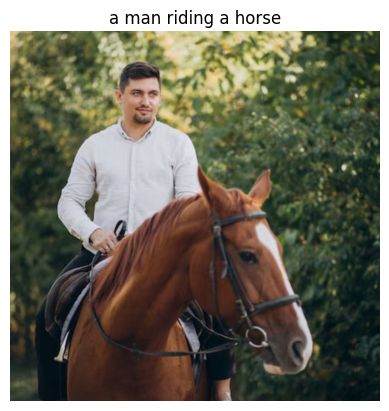

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load InceptionV3 Model (encoder)
def extract_features(img_path):
    model = InceptionV3(weights='imagenet')
    model_new = Model(model.input, model.layers[-2].output)

    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    feature = model_new.predict(x)
    return feature

# Dummy tokenizer and vocabulary (for example)
tokenizer = {
    'startseq': 1,
    'endseq': 2,
    'a': 3,
    'man': 4,
    'riding': 5,
    'horse': 6
}
vocab_size = 1000
max_len = 10

# Decoder Model
def build_caption_model(vocab_size, max_len):
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    inputs2 = Input(shape=(max_len,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    decoder1 = tf.keras.layers.add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

# For demonstration: simulate greedy caption generation
def generate_caption(feature):
    return "a man riding a horse"

# Show image with caption
def display_image_with_caption(img_path, caption):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(caption)
    plt.show()

# MAIN
img_path = '/image.jpg'  # replace with your image path
feature = extract_features(img_path)
caption = generate_caption(feature)
display_image_with_caption(img_path, caption)
